In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [15]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-tax-gnp-bd.csv'
df = pd.read_csv(url)
df.head()

,YEAR,GNP,POPULATION,TAX
0,1980,1499.68,82.498,19.400
1,1981,1583.50,84.764,22.500
2,1982,1634.27,87.061,24.400
3,1983,1709.60,89.400,27.000
4,1984,1781.02,91.804,32.265


<AxesSubplot: xlabel='POPULATION', ylabel='GNP'>

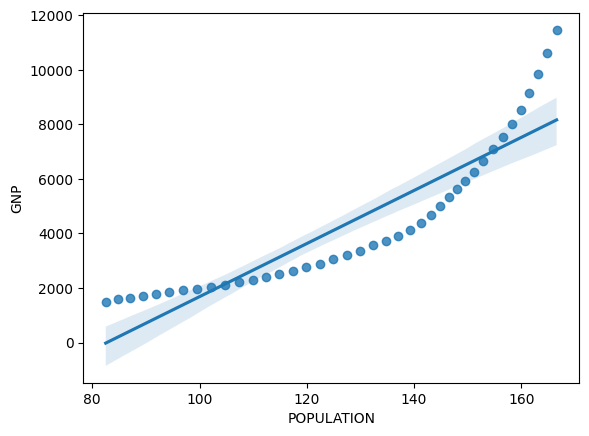

In [16]:
sns.regplot(x=df['POPULATION'], y=df['GNP'])

<AxesSubplot: xlabel='POPULATION', ylabel='GNP'>

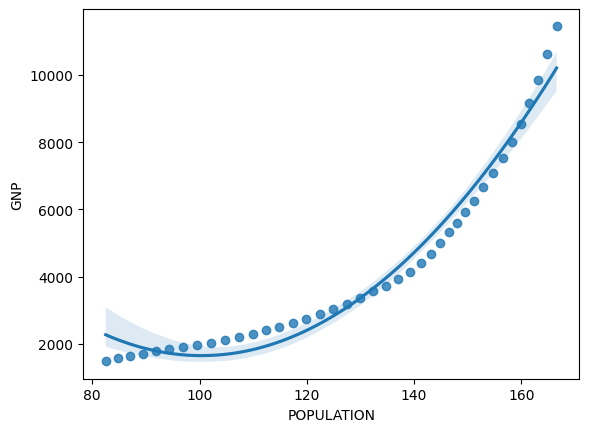

In [17]:
sns.regplot(x=df['POPULATION'], y=df['GNP'], data=df, order=2)

<AxesSubplot: xlabel='POPULATION', ylabel='GNP'>

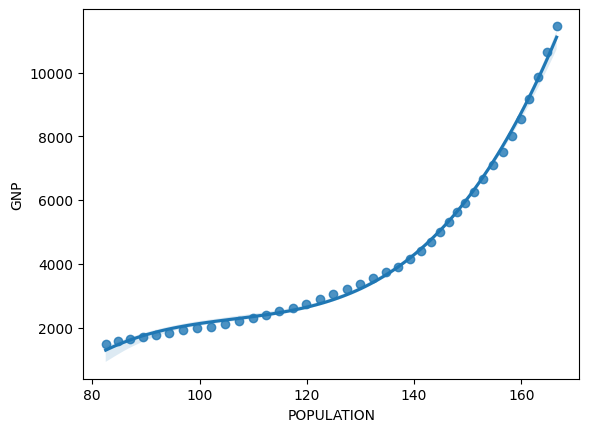

In [18]:
sns.regplot(x=df['POPULATION'], y=df['GNP'], data=df, order=3)

# We can see that, 3rd degree Polynomial are the best fit. Now for Polynomial Regression we transform our data set into 3rd degree

In [19]:
X = df['POPULATION'].values.reshape(-1, 1)
y = df['GNP'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
X_ = pf.fit_transform(X)
X_test_ = pf.fit_transform(X_test)

In [21]:
poly = LinearRegression()
poly.fit(X_, y)
poly.coef_

array([[ 0.00000000e+00,  1.20802698e+03, -1.11503188e+01,
         3.49081200e-02]])

In [24]:
#defining prediction data frame 

predictions = poly.predict(X_test_)

In [26]:
# Now we see the various outcome from this model

print("Coefficients: ", poly.coef_)
print("Intercept: ", poly.intercept_)
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Coefficients:  [[ 0.00000000e+00  1.20802698e+03 -1.11503188e+01  3.49081200e-02]]
Intercept:  [-42077.2106119]
MAE:  108.70454949316931
MSE  21057.19644703386
RMSE:  145.11097976043666


In [27]:
accuracy = poly.score(X_test_, y_test)
print("Accuracy: ", accuracy*100, '%')

Accuracy:  99.79555955003477 %


# This model can predict with 99% accuracy

#### Now it's time to predict with this model, if our population is 200 million (20 crores), what will be the size of our GNP?

In [28]:
X = ['200']
X

['200']

In [29]:
yhat = {'POPULATION': ['200']}
yhatDf = pd.DataFrame(yhat)
yhatDf

,POPULATION
0,200


In [30]:
yhatDfReshape = yhatDf['POPULATION'].values.reshape(-1, 1)

polyFit = pf.fit_transform(yhatDfReshape)

In [31]:
poly.predict(polyFit)

array([[32780.39276655]])

### We got, if the population of Bangladesh is 200 million, then our GNP will be Tk 327280.39 billion.